In [64]:
from collections import Counter
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from enums import stage_dict, char_dict, platform_dict, dan_names_dict, battle_type_dict
from read_data import read_data_into_dataframe
from data_processing import get_unique_players, calculate_win_rates_with_confidence_interval, get_most_popular_characters, get_rank_distribution, split_unique_players, split_replays_into_categories, calculate_percentiles
from plotting import plot_win_rates, plot_most_popular_characters, plot_rank_distribution, plot_win_rates_with_confidence_intervals

In [3]:
%matplotlib inline  

In [4]:
jsons_directory = './data_05_10/'
master_df = read_data_into_dataframe(jsons_directory)

Read 3048948 games from 3052 files
94 files were unable to be read


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765015 entries, 0 to 3048947
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   battleId       765015 non-null  object
 1   battleType     765015 non-null  int64 
 2   gameVersion    765015 non-null  int64 
 3   winResult      765015 non-null  int64 
 4   totalRoundNum  765015 non-null  int64 
 5   battleAt       765015 non-null  int64 
 6   viewNum        765015 non-null  int64 
 7   stageId        765015 non-null  object
 8   highlightFlag  765015 non-null  bool  
 9   1pUserId       765015 non-null  object
 10  1pPlayerName   765015 non-null  object
 11  1pPolarisId    765015 non-null  object
 12  1pOnlineId     765015 non-null  object
 13  1pNgWordFlag   765015 non-null  int64 
 14  1pPlatform     765015 non-null  int64 
 15  1pRank         765015 non-null  int64 
 16  1pTekkenPower  765015 non-null  int64 
 17  1pCharaId      765015 non-null  object
 18  1pWinRou

In [6]:
# waht percentage of games had chr_0038 in them as player 1 or player 2

# get all the games that chr_0038 was in
chr_0038_games = master_df[(master_df['1pCharaId'] == 'chr_0038') | (master_df['1pCharaId'] == 'chr_0038')]

# get the total number of games
total_games = master_df.shape[0]

# get the number of games that chr_0038 was in
chr_0038_games_count = chr_0038_games.shape[0]

# get the percentage of games that chr_0038 was in
chr_0038_games_percentage = chr_0038_games_count / total_games

print(f'chr_0038 was in {chr_0038_games_percentage * 100}% of games')


chr_0038 was in 2.7336718887864944% of games


In [7]:
master_df.to_csv('output/replays.csv')
master_df.to_json('output/replays.json')

2024-05-10 to 2024-05-11


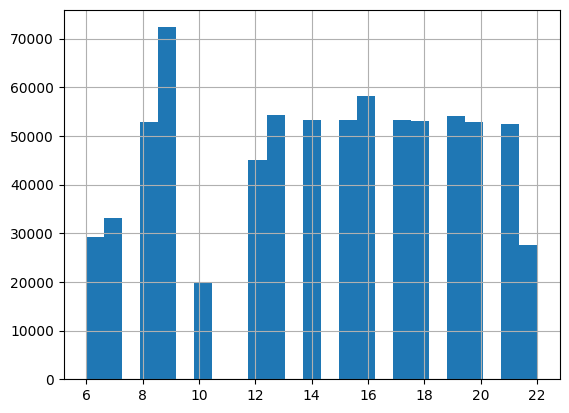

In [28]:
# convert from unix timestamp to datetime
master_df['battleAt'] = pd.to_datetime(master_df['battleAt'], unit='s')

# plot distribution of time of day game was played
master_df['battleAt'].dt.hour.hist(bins=25)

# get the date range of the data as a human readable string
data_date_range = f"{master_df['battleAt'].dt.date.min()} to {master_df['battleAt'].dt.date.max()}"
print(data_date_range)

In [9]:
unique_players = get_unique_players(master_df)
beginner_players, intemediate_players, advanced_players = split_unique_players(unique_players)
beginner_games, intermediate_games, advanced_games = split_replays_into_categories(master_df)

In [10]:
print('Number of unique players:', len(unique_players))
print('Number of beginner players:', len(beginner_players))
print('Number of intermediate players:', len(intemediate_players))
print('Number of advanced players:', len(advanced_players))
print('')
print('Number of unique games:', len(master_df))
print('Number of beginner games:', len(beginner_games))
print('Number of intermediate games:', len(intermediate_games))
print('Number of advanced games:', len(advanced_games))

print('')
print(f'{len(master_df) - (len(beginner_games) + len(intermediate_games) + len(advanced_games))} games were not categorized as they were played by players of from different categories')

Number of unique players: 125077
Number of beginner players: 28921
Number of intermediate players: 80126
Number of advanced players: 16030

Number of unique games: 765015
Number of beginner games: 106930
Number of intermediate games: 424141
Number of advanced games: 80871

153073 games were not categorized as they were played by players of from different categories


In [11]:
brackets_dict = {
	'beginner': {
		'players': beginner_players,
		'games': beginner_games,
		},
		'intermediate': {
			'players': intemediate_players,
			'games': intermediate_games,
		},
		'advanced': {
			'players': advanced_players,
			'games': advanced_games,
		},
} 


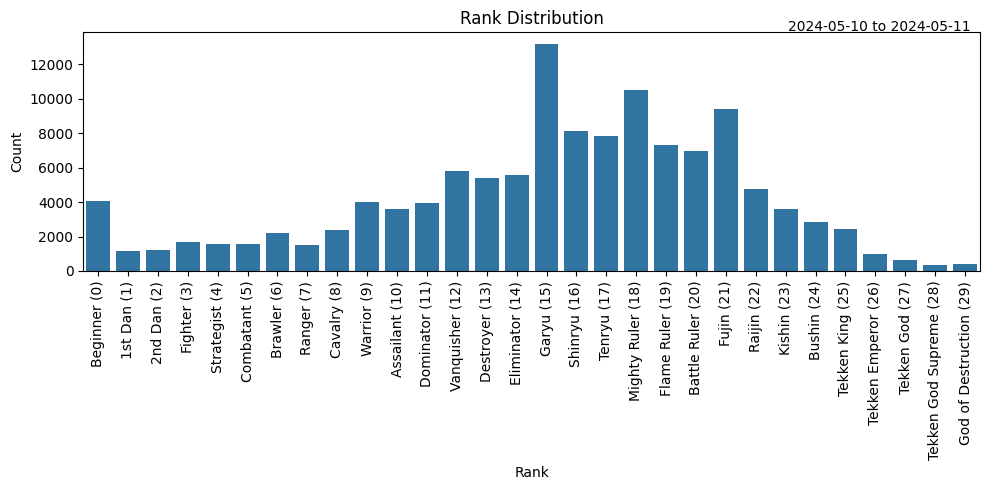

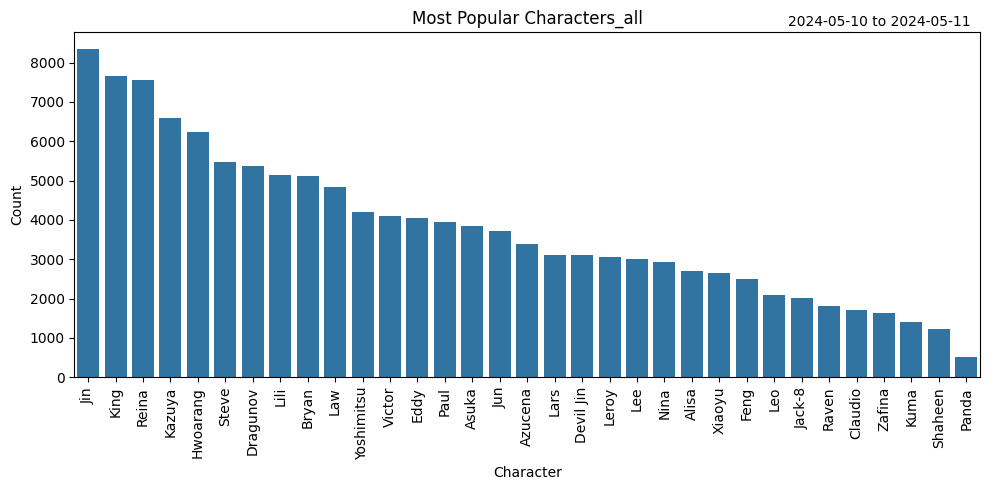

Number of mirror matches: 33429
Number of matches with draws: 0


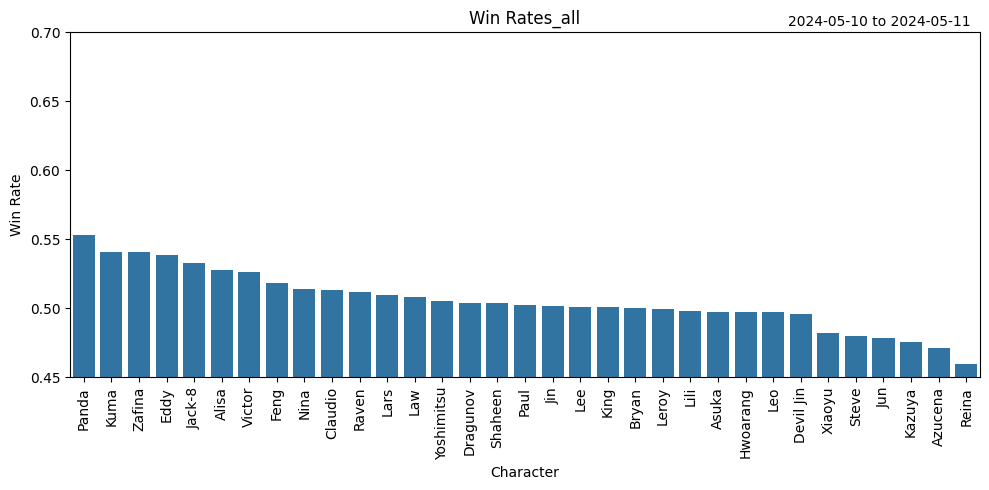

Number of mirror matches: 4617
Number of matches with draws: 0
graph_limits (0.3404506286198616, 0.6802659097699433)


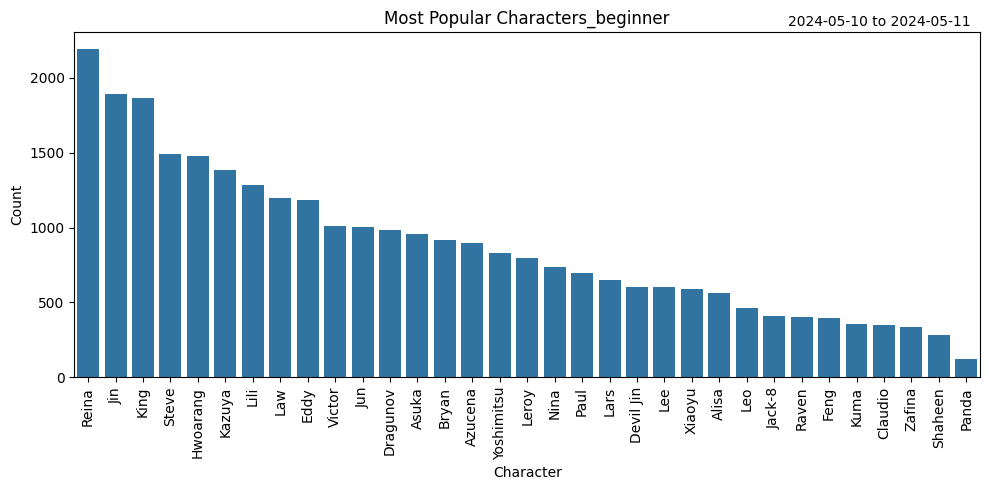

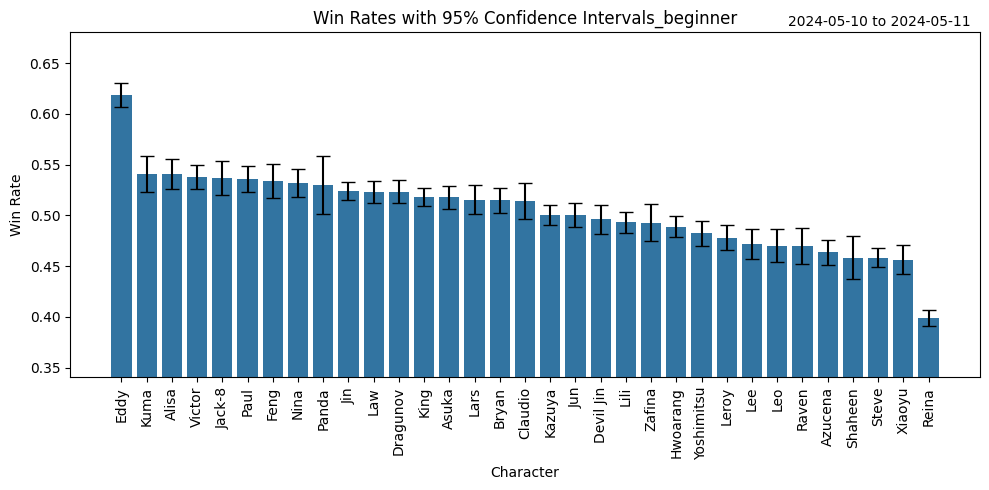

Number of mirror matches: 18091
Number of matches with draws: 0
graph_limits (0.41431338369165216, 0.6182565789473685)


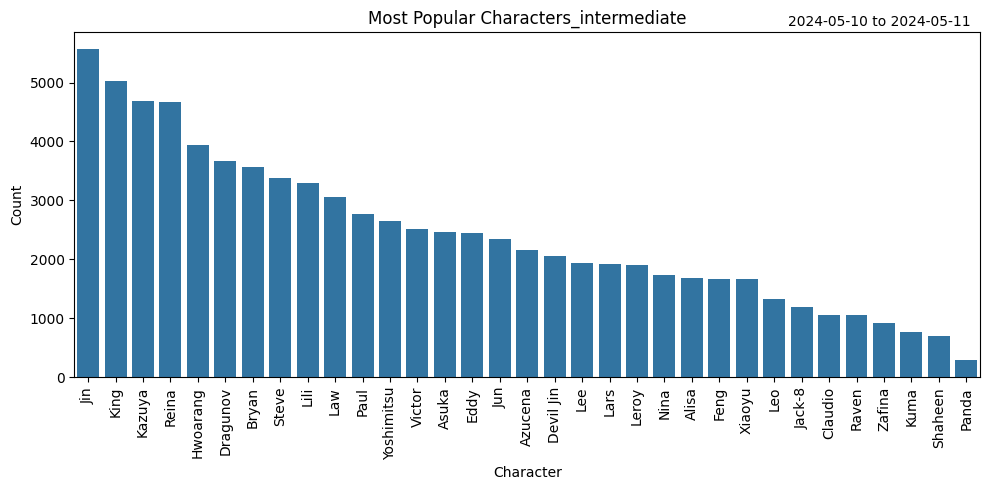

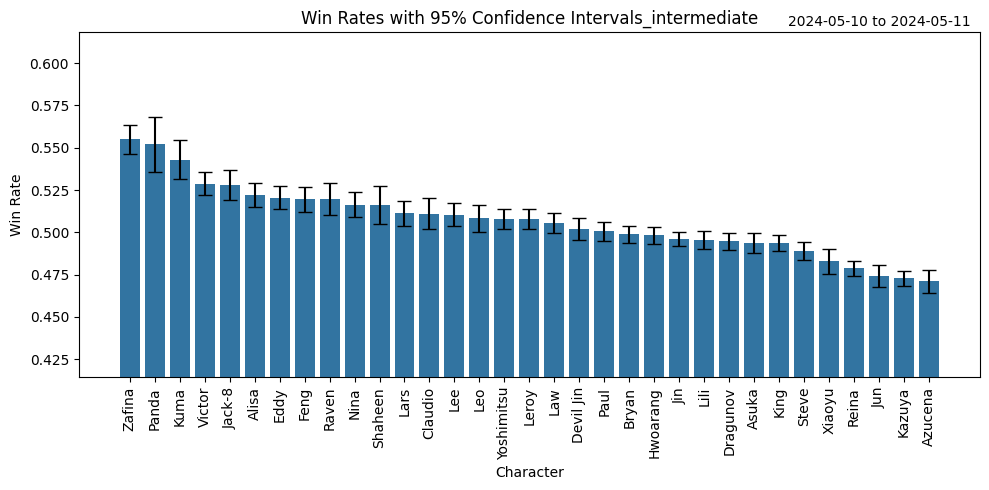

Number of mirror matches: 3238
Number of matches with draws: 0
graph_limits (0.40160103054839896, 0.6202875399361023)


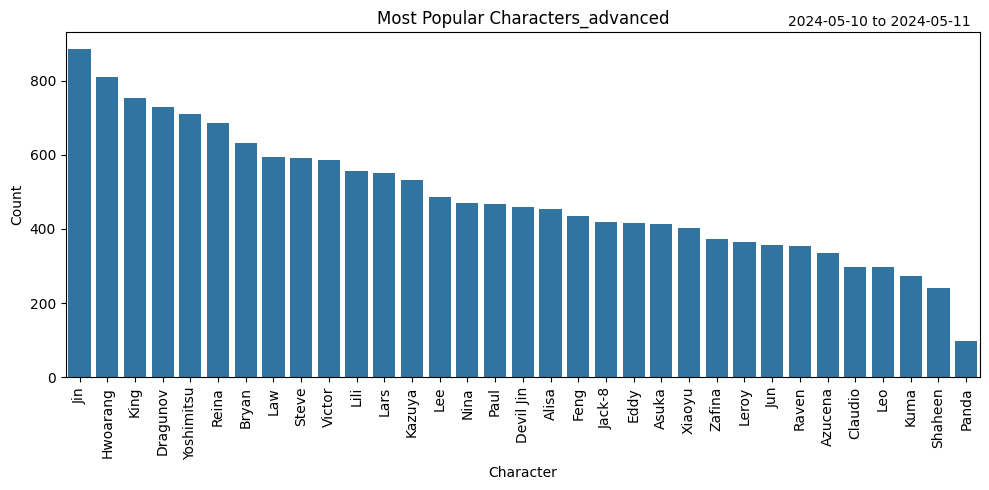

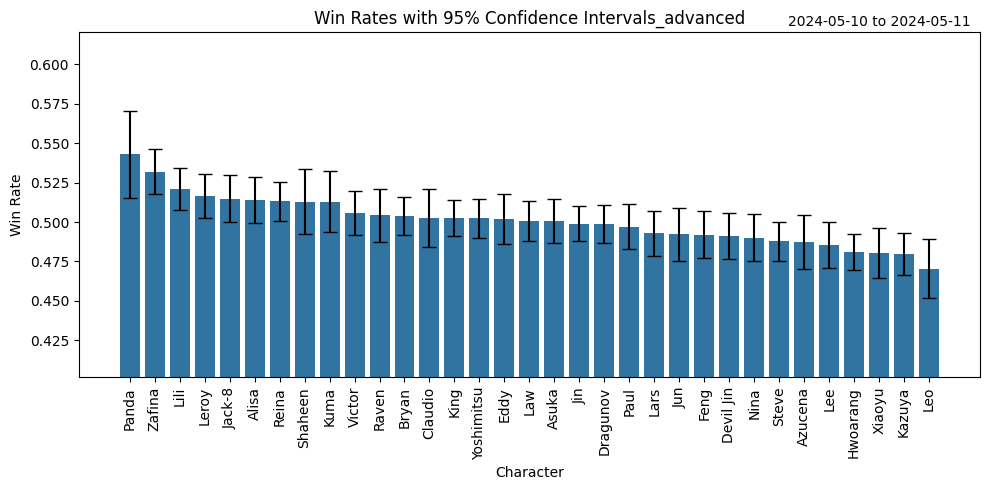

In [12]:
rank_counts = get_rank_distribution(unique_players)
plot_rank_distribution(rank_counts, date_range=data_date_range)
character_counts = get_most_popular_characters(unique_players)
plot_most_popular_characters(character_counts, 'all', date_range=data_date_range)
win_rates, intervals = calculate_win_rates_with_confidence_interval(master_df)
plot_win_rates(win_rates, 'all', date_range=data_date_range)


for bracket in brackets_dict:
    character_counts = get_most_popular_characters(brackets_dict[bracket]['players'])
    games = brackets_dict[bracket]['games']
    win_rates, intervals = calculate_win_rates_with_confidence_interval(games)
    min_winrate = np.array(list(intervals.values())).min()
    max_winrate = np.array(list(intervals.values())).max()
    graph_limits = (min(min_winrate - 0.05, 0.45) , max(max_winrate + 0.05, 0.6))
    print('graph_limits', graph_limits)
    plot_most_popular_characters(character_counts, bracket, date_range=data_date_range)
    plot_win_rates_with_confidence_intervals(win_rates, intervals, bracket_name=bracket, ylim=graph_limits, date_range=data_date_range)

In [13]:
calculate_percentiles(rank_counts)

{'Beginner': 0.0,
 '1st Dan': 3.230010313646794,
 '2nd Dan': 4.177426705149627,
 'Fighter': 5.132038664182863,
 'Strategist': 6.483206344891547,
 'Combatant': 7.7584208127793275,
 'Brawler': 9.01044956306915,
 'Ranger': 10.75417542793639,
 'Cavalry': 11.980619938118119,
 'Warrior': 13.873853706117032,
 'Assailant': 17.09426992972329,
 'Dominator': 19.95570728431286,
 'Vanquisher': 23.1225565051928,
 'Destroyer': 27.76849460732189,
 'Eliminator': 32.11141936567075,
 'Garyu': 36.5558815769486,
 'Shinryu': 47.11657618906753,
 'Tenryu': 53.6173716990334,
 'Mighty Ruler': 59.86952037544873,
 'Flame Ruler': 68.2707452209439,
 'Battle Ruler': 74.11514507063649,
 'Fujin': 79.67412074162316,
 'Raijin': 87.18389472085195,
 'Kishin': 91.00713960200515,
 'Bushin': 93.88536661416568,
 'Tekken King': 96.13917826618803,
 'Tekken Emperor': 98.07798396187948,
 'Tekken God': 98.88548654029118,
 'Tekken God Supreme': 99.40836444750035,
 'God of Destruction': 99.6921896111995}

In [14]:
# quick test to make sure the average win rate is close to 50%
# it should be exactly 50% since there is a win and a loss for each game
# but that is not the case since we are not considering the play rate of each character in this simple calculation

win_rates, _ = calculate_win_rates_with_confidence_interval(master_df)

average_win_rate = sum(win_rates.values()) / len(win_rates)
if abs(average_win_rate - 0.5) < 0.05:
    print(f"The average win rate ({average_win_rate}) is close to 50%.")
else:
    print(f"The average win rate ({average_win_rate})is not close to 50%.")


Number of mirror matches: 33429
Number of matches with draws: 0
The average win rate (0.5056838133025072) is close to 50%.


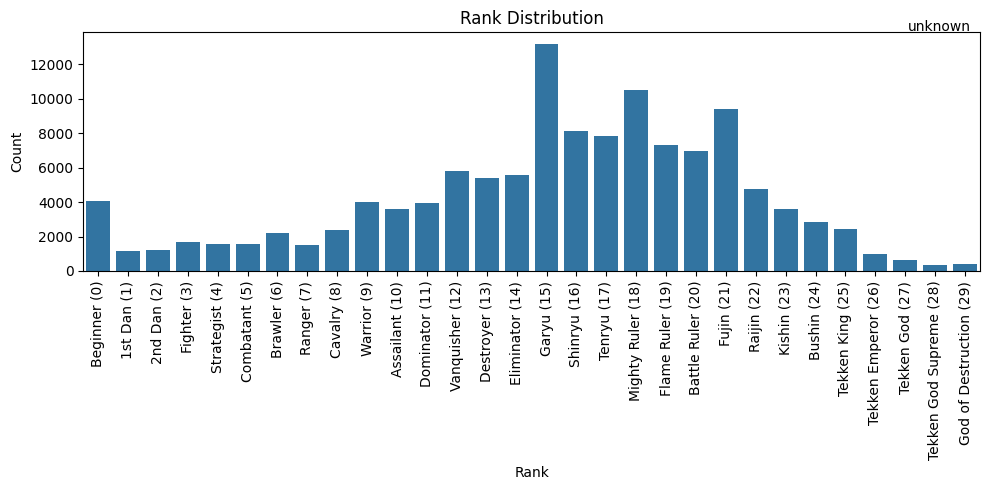

In [15]:
plot_rank_distribution(rank_counts)

chr_0000: Paul


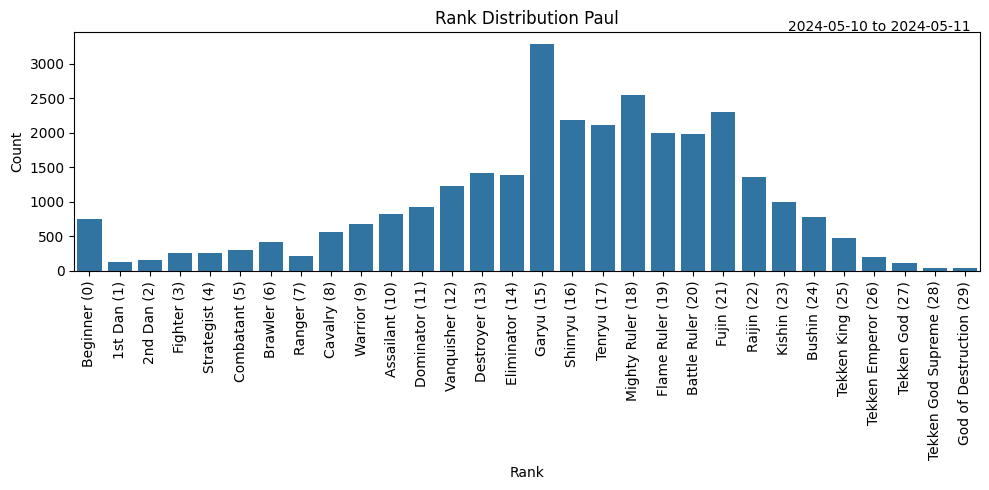

chr_0001: Law


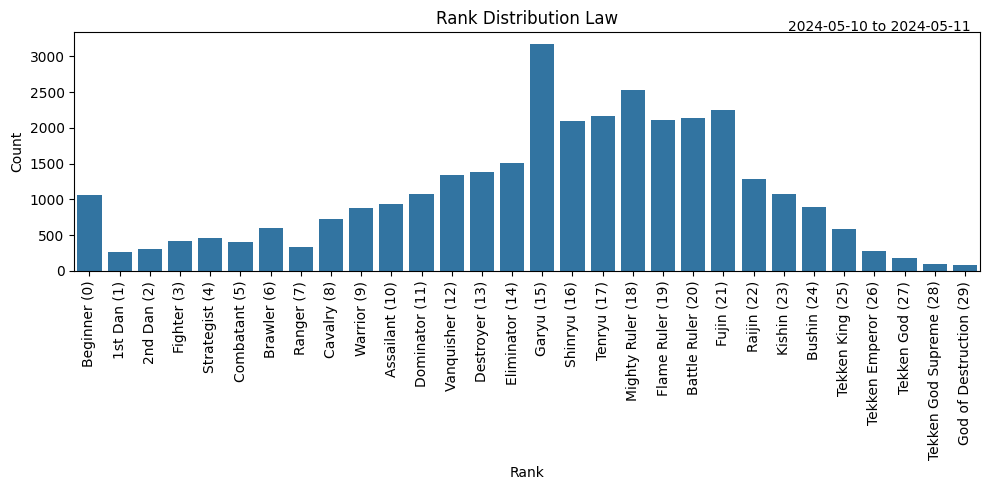

chr_0002: King


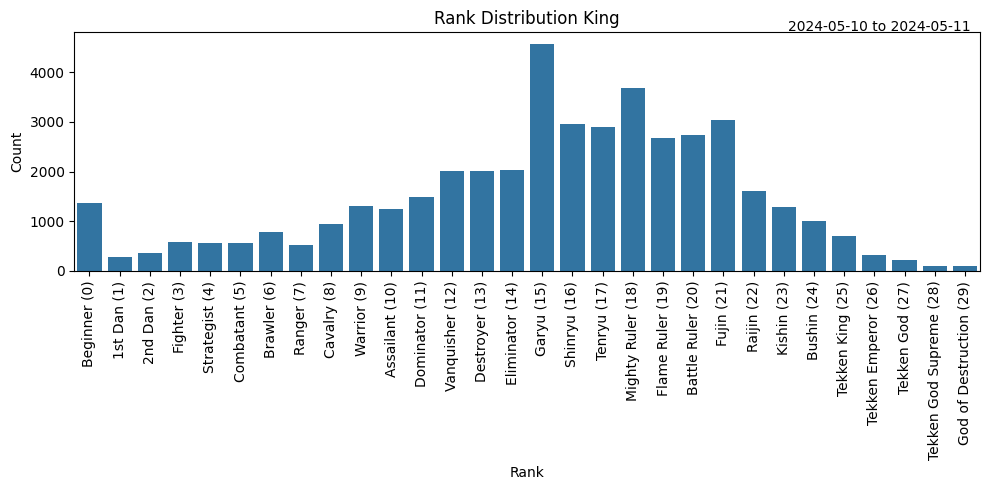

chr_0003: Yoshimitsu


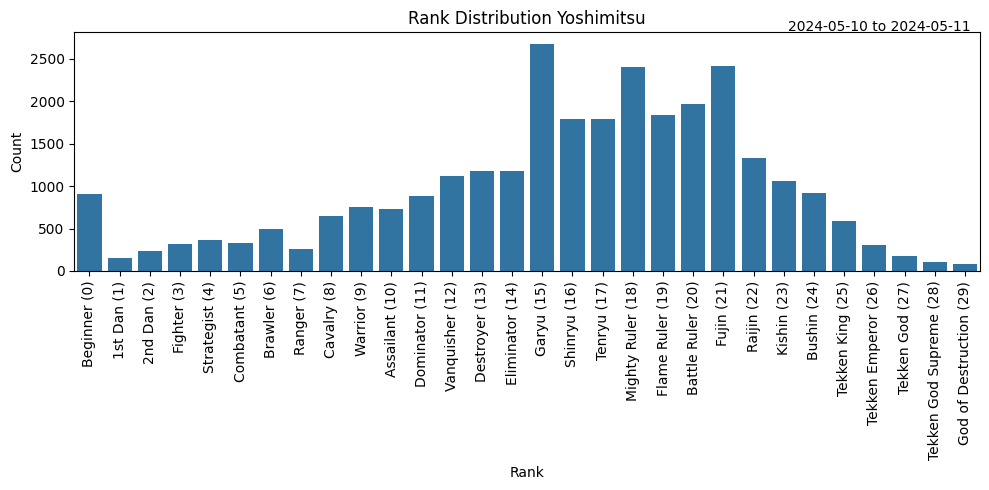

chr_0004: Hwoarang


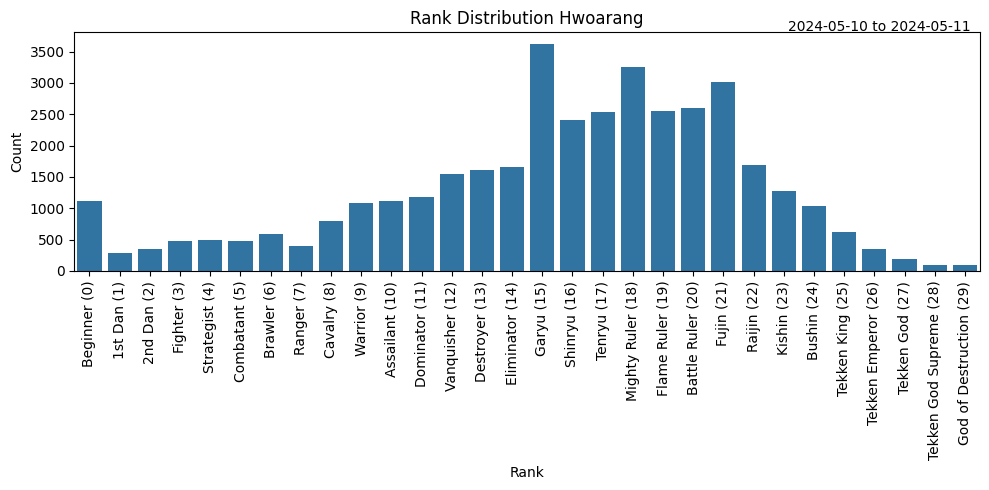

chr_0005: Xiaoyu


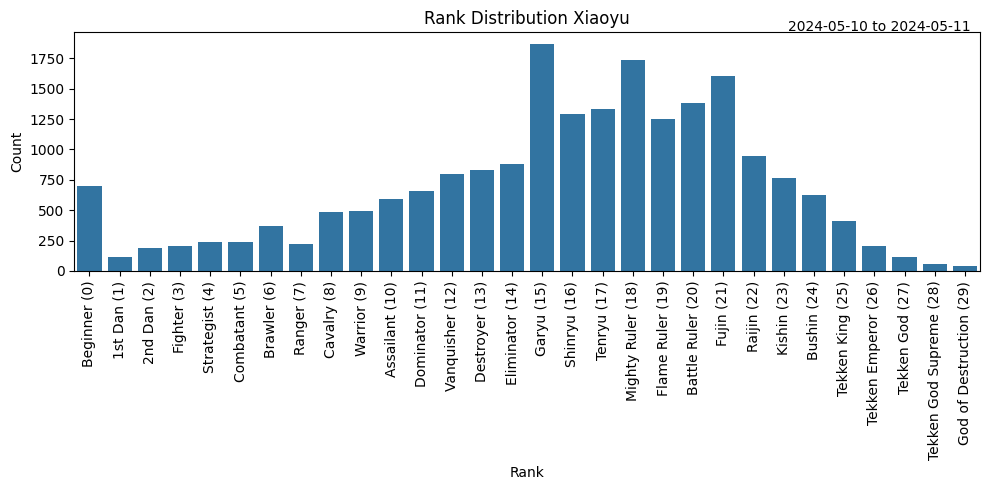

chr_0006: Jin


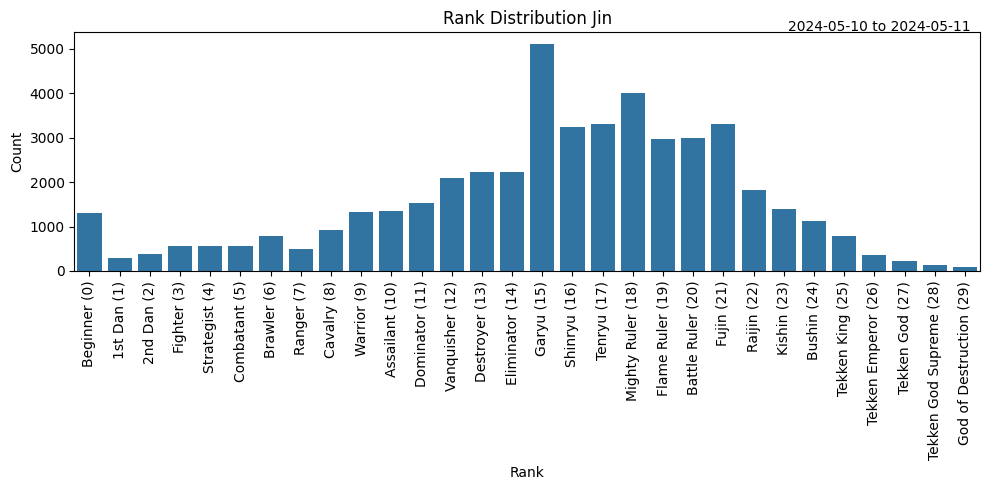

chr_0007: Bryan


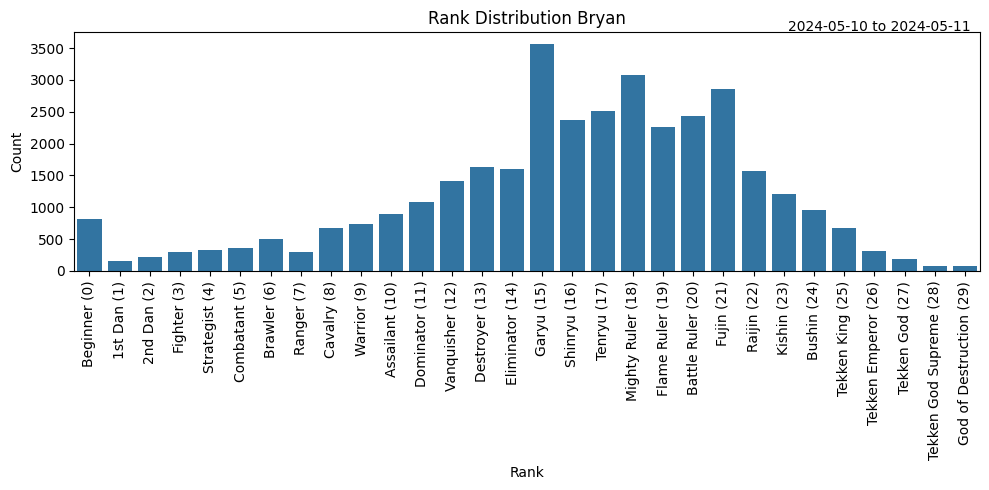

chr_0008: Kazuya


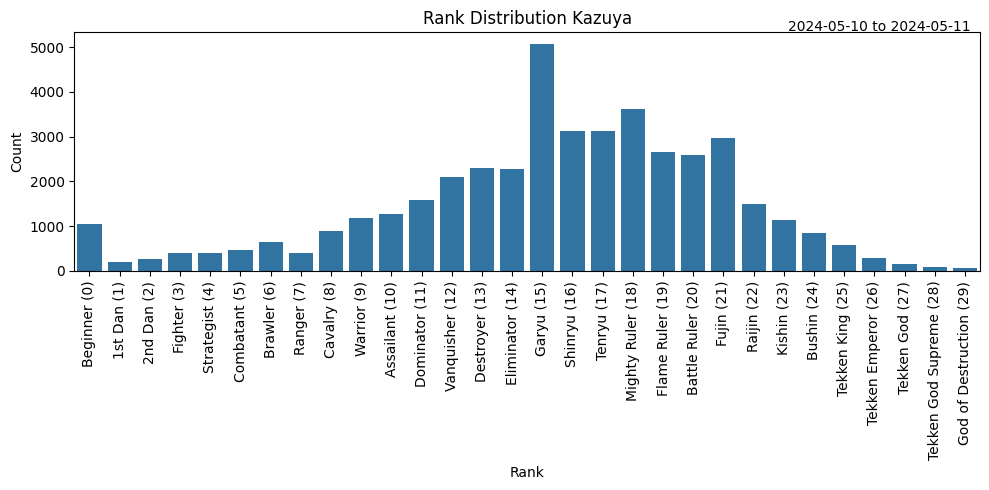

chr_0009: Steve


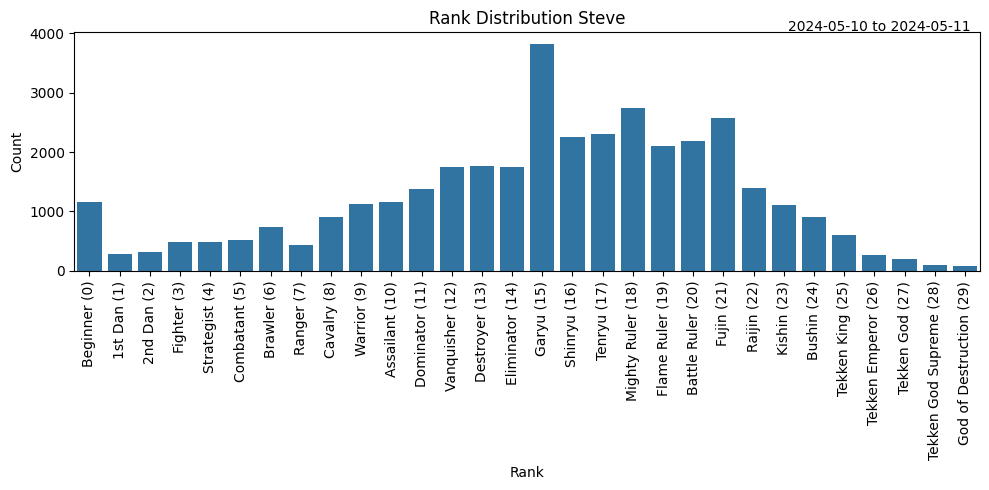

chr_0010: Jack-8


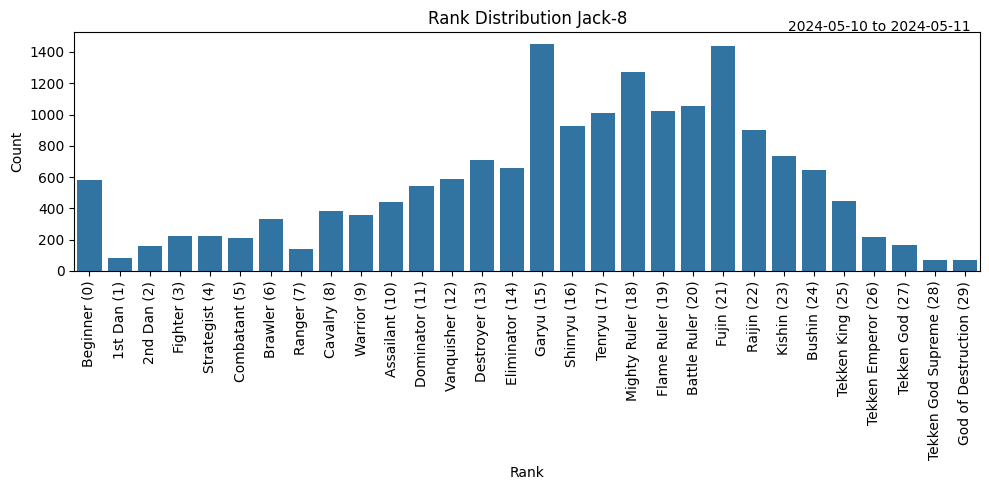

chr_0011: Asuka


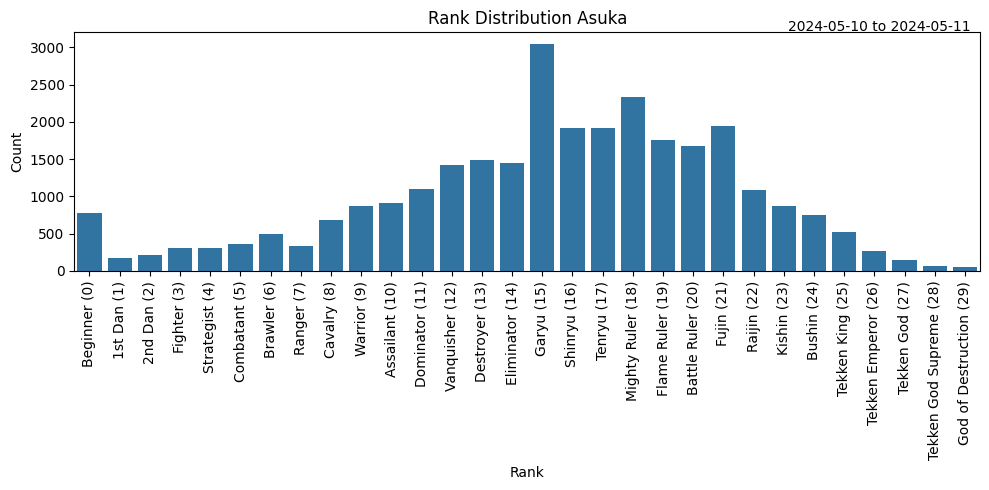

chr_0012: Devil Jin


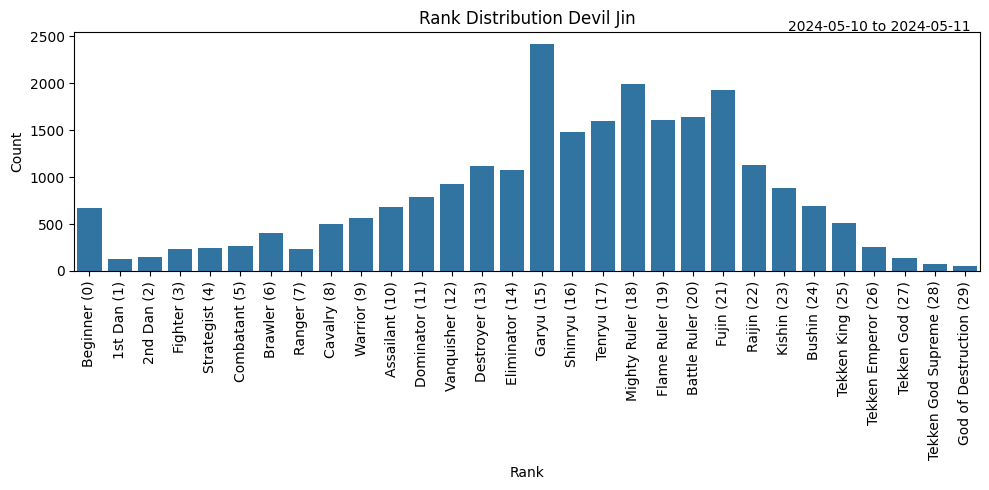

chr_0013: Feng


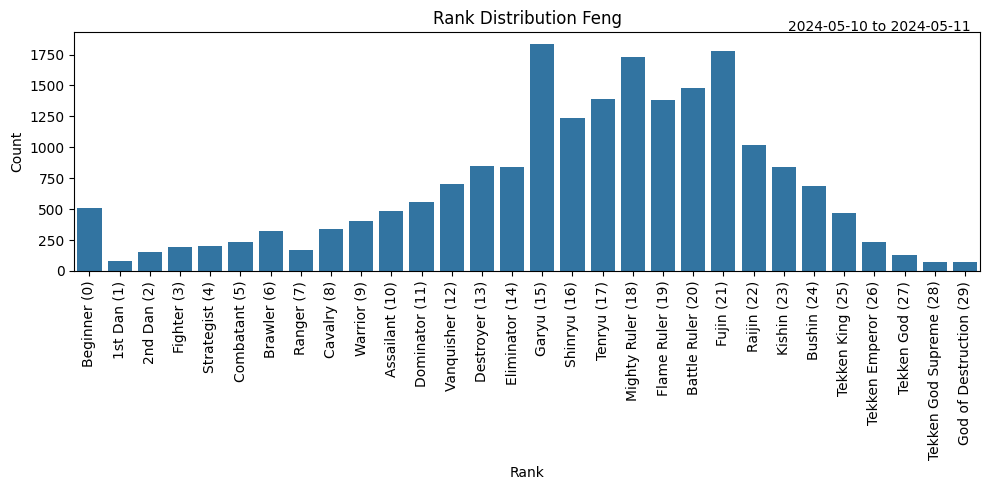

chr_0014: Lili


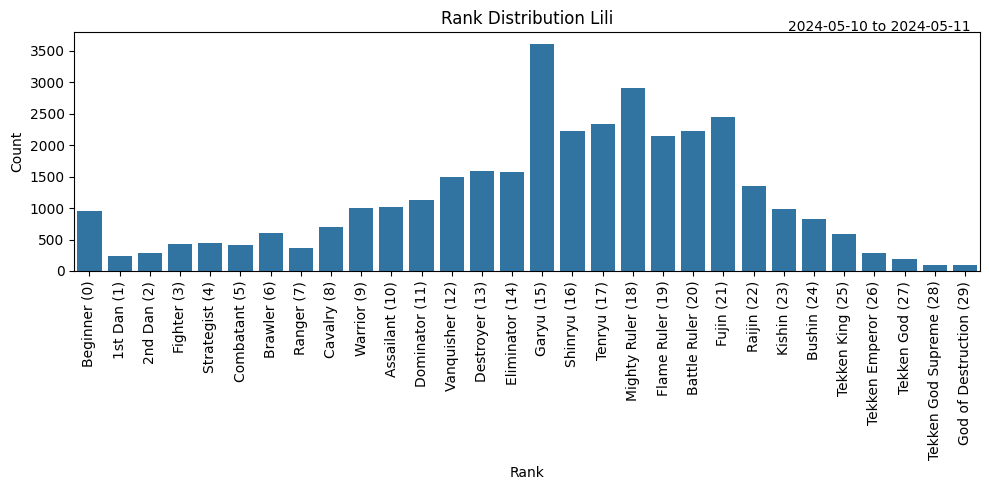

chr_0015: Dragunov


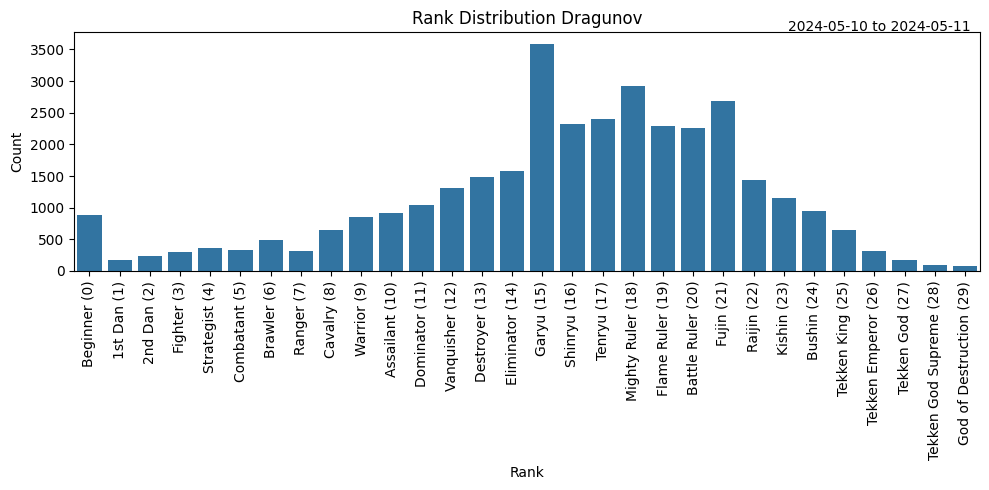

chr_0016: Leo


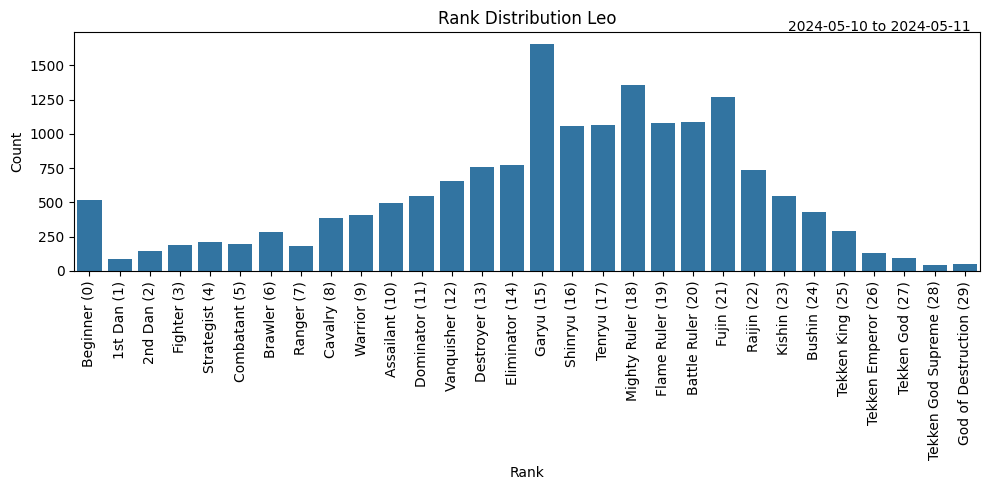

chr_0017: Lars


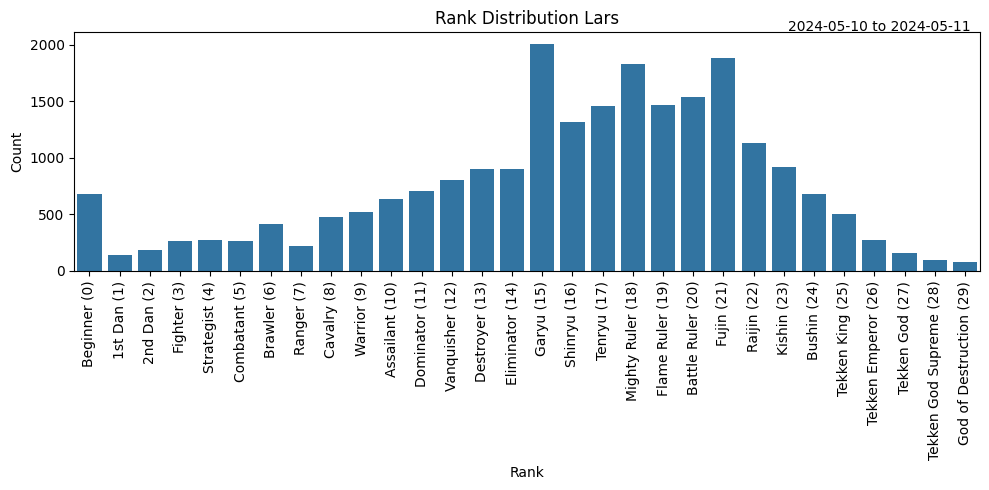

chr_0018: Alisa


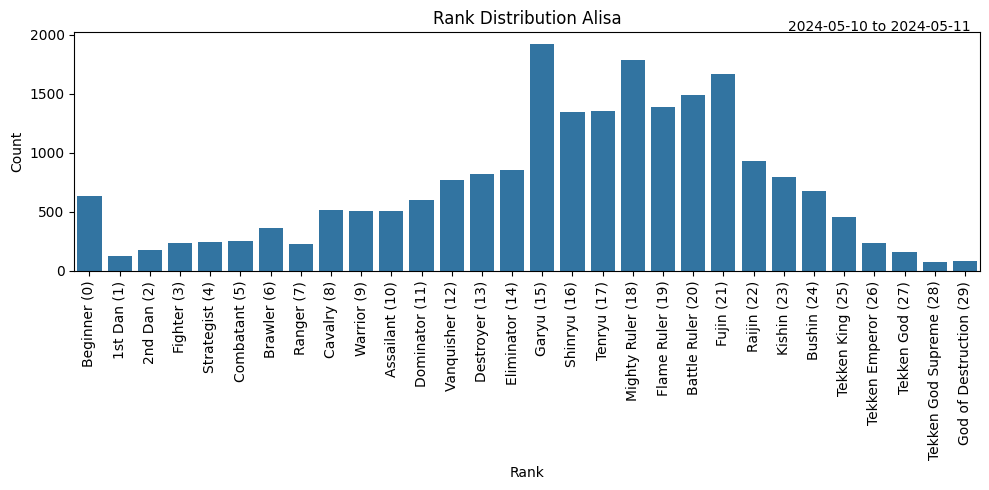

chr_0019: Claudio


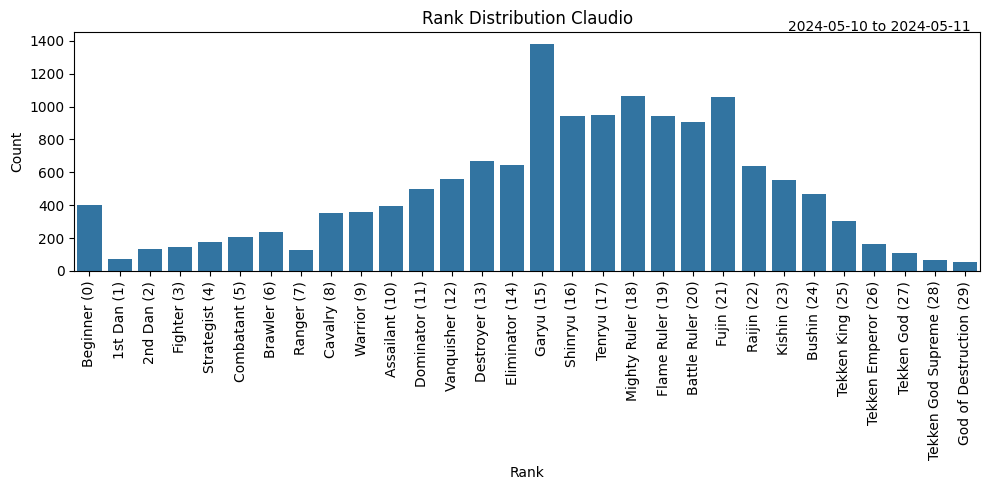

chr_0020: Shaheen


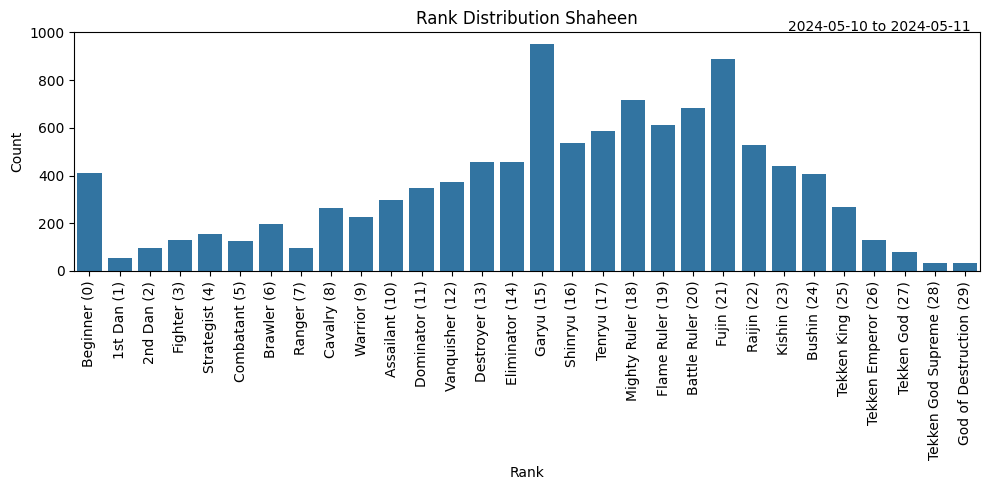

chr_0021: Nina


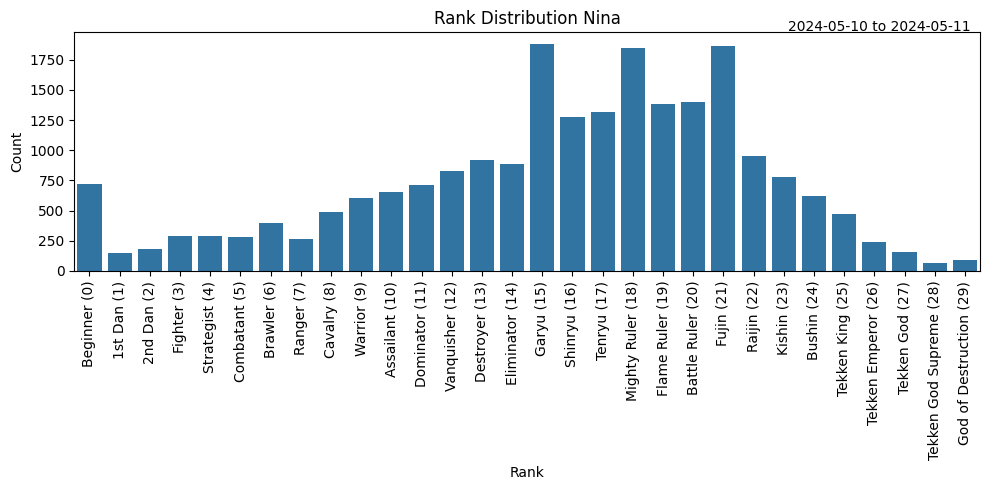

chr_0022: Lee


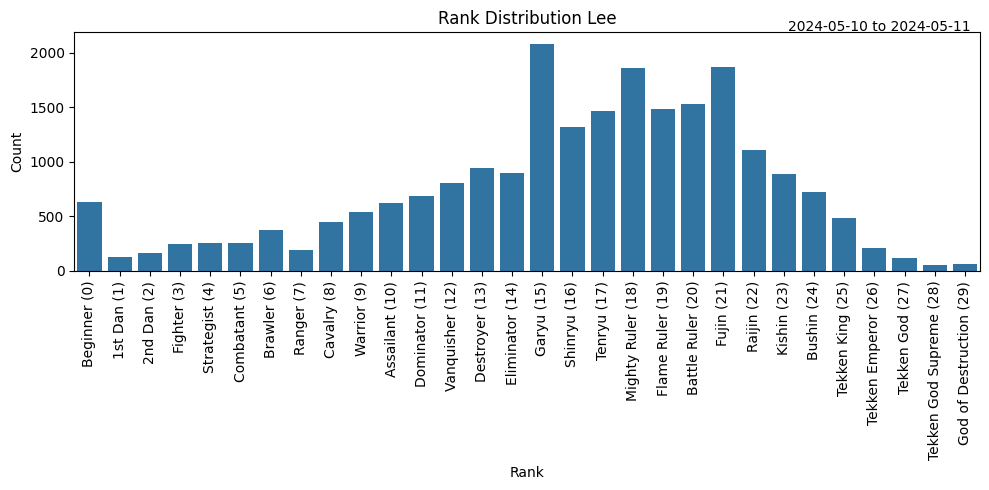

chr_0023: Kuma


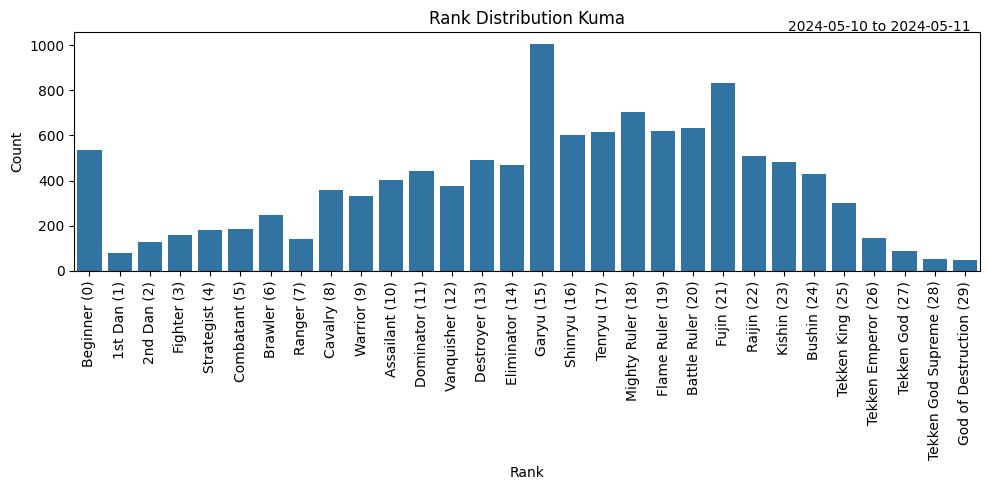

chr_0024: Panda


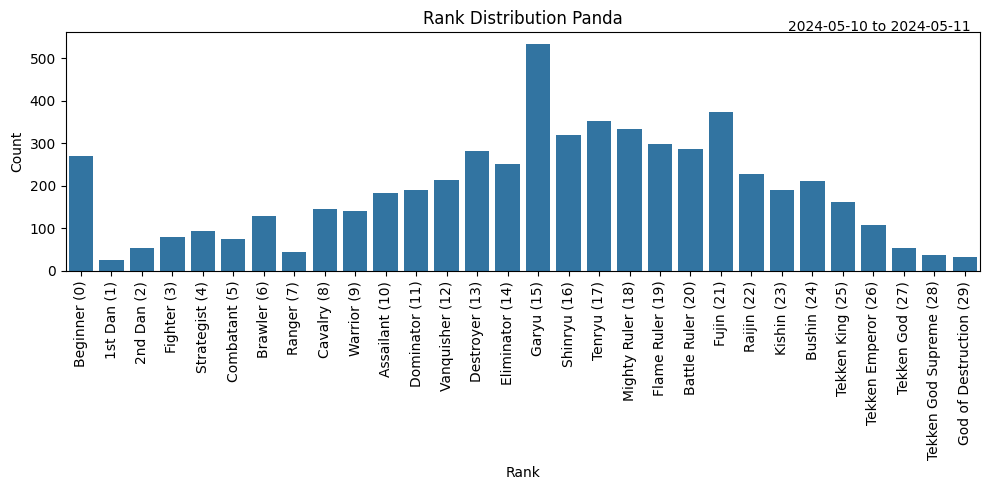

chr_0028: Zafina


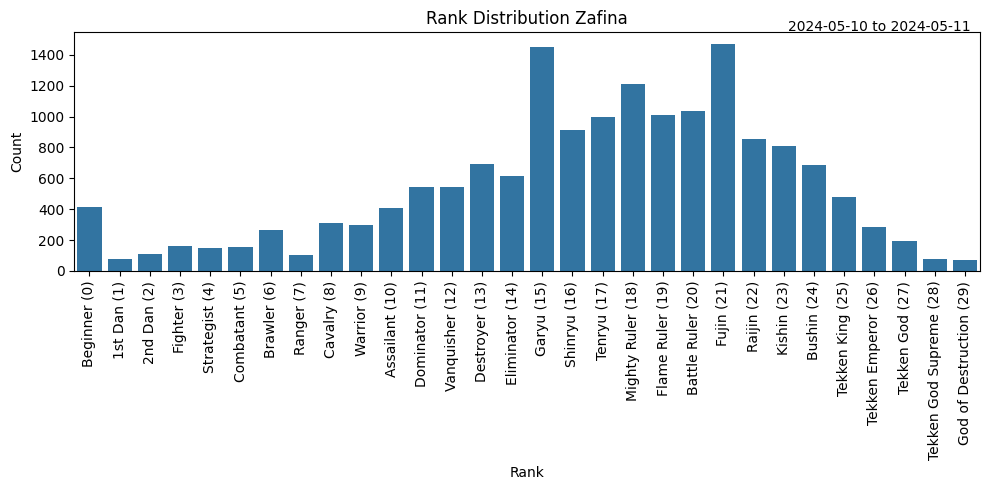

chr_0029: Leroy


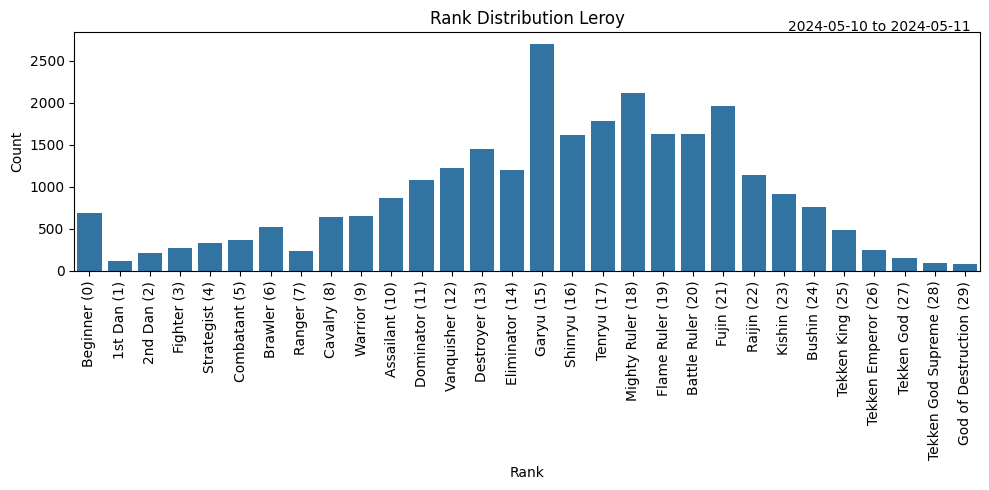

chr_0032: Jun


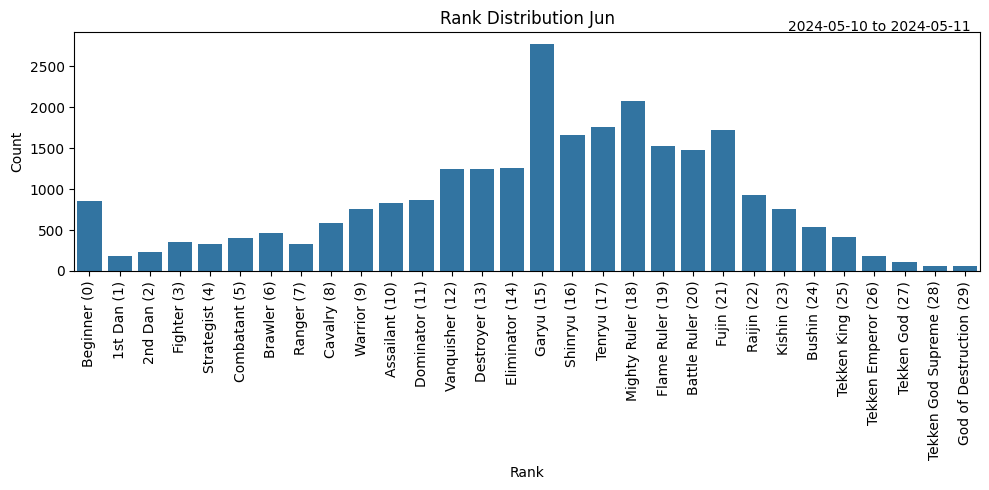

chr_0033: Reina


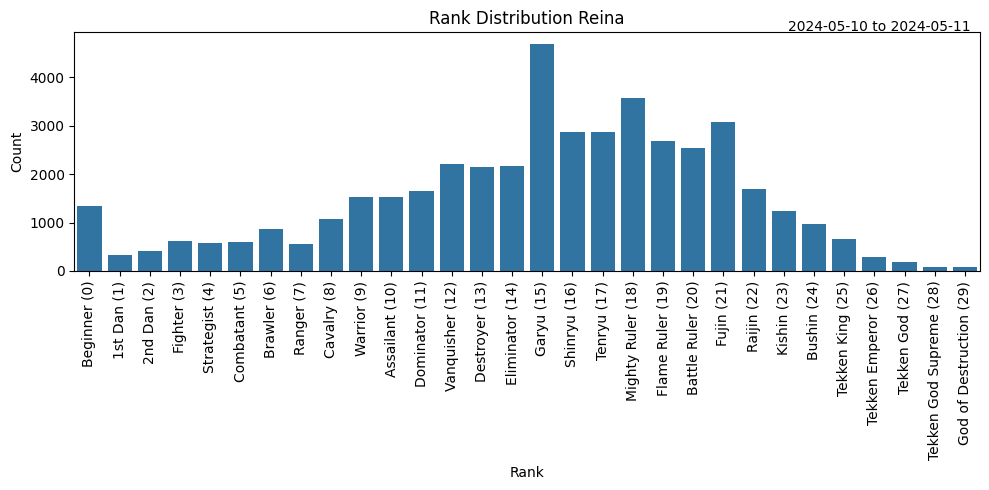

chr_0034: Azucena


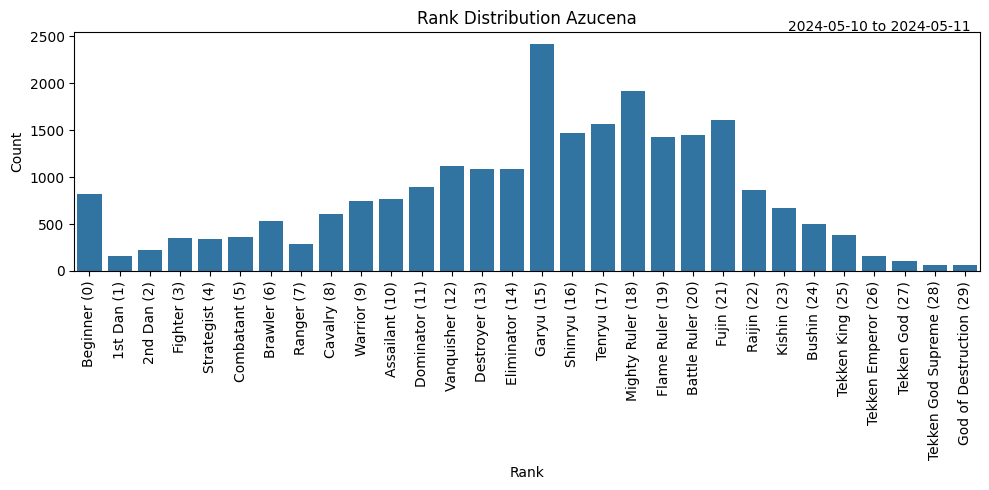

chr_0035: Victor


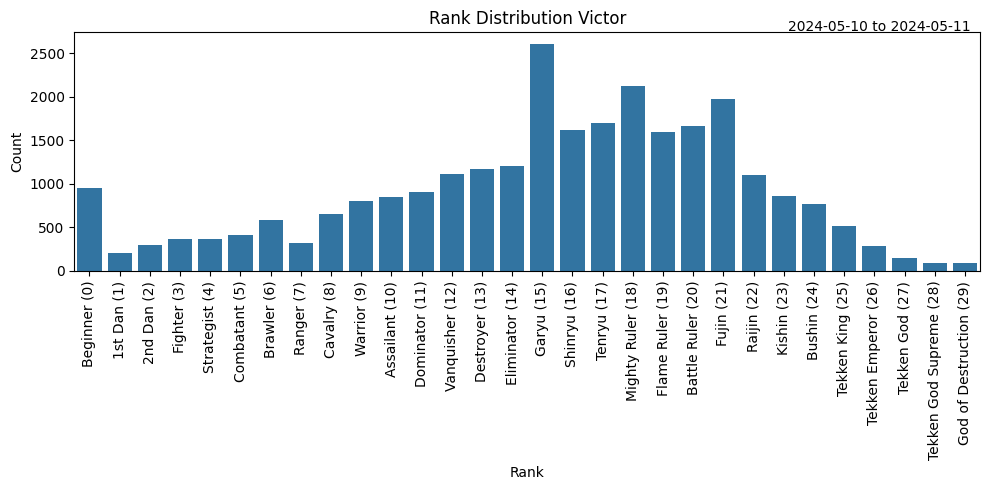

chr_0036: Raven


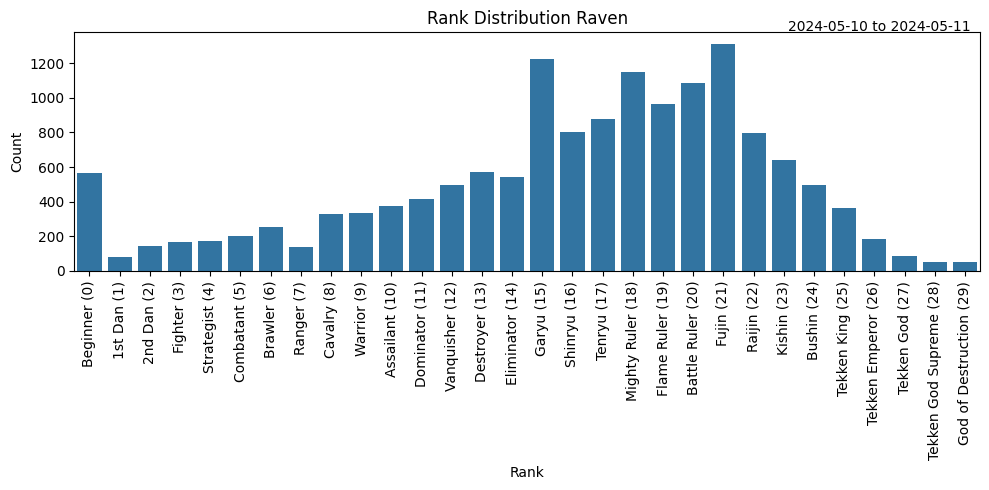

chr_0038: Eddy


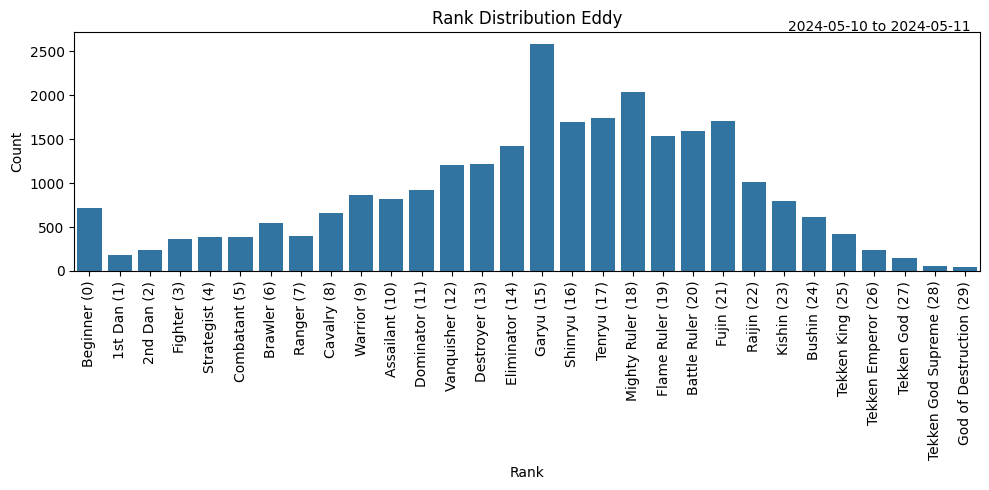

In [30]:
# generate plots for each character
for char in char_dict.keys():
    print(f'{char}: {char_dict[char]}')

    char_games = master_df[(master_df['1pCharaId'] == char) | (master_df['2pCharaId'] == char)]
     
    # plot distribution of rank for games with this character
    char_rank_counts = get_rank_distribution(get_unique_players(char_games))
    plot_rank_distribution(char_rank_counts, data_date_range, title=f'Rank Distribution {char_dict[char]}')

In [17]:
# lets count how many players there are on each platform using unique_players
platform_counts = Counter([data['platform'] for user_id, data in unique_players.items()])
platform_counts = dict(platform_counts)
platform_counts = {k: v for k, v in sorted(platform_counts.items(), key=lambda item: item[1], reverse=True)}

# replace the platform names with the actual names from the platform dictionary
platform_counts = {platform_dict[k]: v for k, v in platform_counts.items()}

# lets normalize the counts
total = sum(platform_counts.values())
platform_counts = {k: v/total for k, v in platform_counts.items()}

# combine ps? and xbox? into a single category
platform_counts['console'] = platform_counts[platform_dict[8]] + platform_counts[platform_dict[9]]


platform_counts

{'pc': 0.531752440496654,
 'console/PS?': 0.39350959808757807,
 'console/XBOX?': 0.07473796141576788,
 'console': 0.46824755950334596}

In [18]:
# let's save the unique players dictionary to a csv file

with open('unique_players.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['user_id', 'rank', 'char', 'platform', 'tekken_power', 'characters'])
    for user_id, data in unique_players.items():
        writer.writerow([user_id, data['rank'], data['char'], platform_dict[data['platform']], data['tekken_power'], data['characters']])

# now let's do the same for the master dataframe
    
# let's first remove duplicate replays based on the battleId   

# let's save the master dataframe to a csv file
master_df.to_csv('replays.csv', index=False)

In [19]:
import yaml

character_counts = get_most_popular_characters(unique_players)
win_rates, win_rates_intervals = calculate_win_rates_with_confidence_interval(master_df)
# Calculate win rates for each bracket
beginner_win_rates, beginner_win_rates_intervals = calculate_win_rates_with_confidence_interval(beginner_games)
intermediate_win_rates, intermediate_win_rates_intervals = calculate_win_rates_with_confidence_interval(intermediate_games)
advanced_win_rates, advanced_win_rates_intervals = calculate_win_rates_with_confidence_interval(advanced_games)

Number of mirror matches: 33429
Number of matches with draws: 0
Number of mirror matches: 4617
Number of matches with draws: 0
Number of mirror matches: 18091
Number of matches with draws: 0
Number of mirror matches: 3238
Number of matches with draws: 0


In [20]:
# Compile the visual data into a single YAML report
report_data = {
    'Number of unique players': len(unique_players),
    'Number of beginner players': len(beginner_players),
    'Number of intermediate players': len(intemediate_players),
    'Number of advanced players': len(advanced_players),
    'Number of unique games': len(master_df),
    'Number of beginner games': len(beginner_games),
    'Number of intermediate games': len(intermediate_games),
    'Number of advanced games': len(advanced_games),
    'Average win rate': average_win_rate,
    'Rank distribution': rank_counts,
    'Platform distribution': platform_counts,
    'Character counts': character_counts,
    'Beginner win rates': beginner_win_rates,
    'Intermediate win rates': intermediate_win_rates,
    'Advanced win rates': advanced_win_rates,
}

with open('report.yaml', 'w') as f:
    yaml.safe_dump(report_data, f, sort_keys=False)


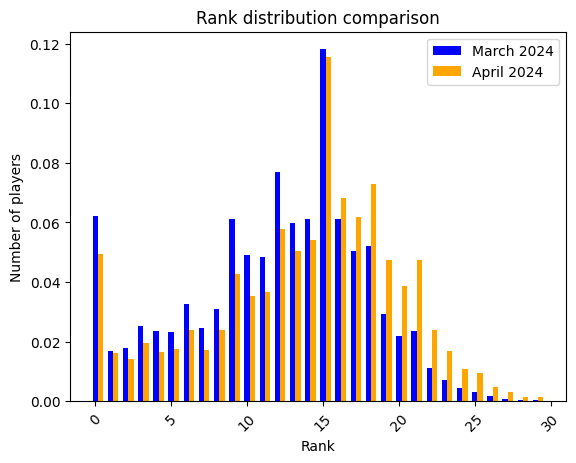

In [21]:
new_rank_distribution = {
    16: 11330,
    14: 8988,
    8: 3970,
    18: 12113,
    25: 1561,
    13: 8339,
    5: 2897,
    4: 2768,
    17: 10254,
    21: 7883,
    20: 6444,
    19: 7856,
    23: 2785,
    15: 19152,
    10: 5869,
    22: 3987,
    12: 9595,
    11: 6111,
    9: 7078,
    7: 2851,
    29: 252,
    27: 500,
    26: 799,
    1: 2669,
    3: 3233,
    24: 1813,
    2: 2348,
    0: 8208,
    6: 3974,
    28: 251
}

old_rank_distribution = {
    10 : 10906,
    0: 13794,
    14: 13602,
    13: 13279,
    12: 17054,
    9: 13600,
    6: 7239,
    19: 6528,
    17: 11223,
    3: 5641,
    15: 26187,
    16: 13571,
    18: 11564,
    20: 4851,
    11: 10755,
    8: 6847,
    7: 5484,
    4: 5217,
    5: 5123,
    2: 3976,
    21: 5212,
    22: 2450,
    27: 188,
    1: 3779,
    26: 369,
    23: 1554,
    25: 676,
    24: 984,
    28: 97,
    29: 79
}

# Sort the keys
new_rank_distribution = {k: new_rank_distribution[k] for k in sorted(new_rank_distribution)}
old_rank_distribution = {k: old_rank_distribution[k] for k in sorted(old_rank_distribution)}

# replace the rank numbers with the actual rank names
new_rank_distribution = {dan_names_dict[k]: v for k, v in new_rank_distribution.items()}
old_rank_distribution = {dan_names_dict[k]: v for k, v in old_rank_distribution.items()}

# normalize the counts
total = sum(new_rank_distribution.values())
new_rank_distribution = {k: v/total for k, v in new_rank_distribution.items()}

total = sum(old_rank_distribution.values())
old_rank_distribution = {k: v/total for k, v in old_rank_distribution.items()}

# plot old and new rank distributions on the same axes to compare them
# we have to use different colors for each distribution
fig, ax = plt.subplots()
plt.xticks(rotation=45)
bar_positions = np.arange(len(old_rank_distribution))
bar_width = 0.35

ax.bar(bar_positions, old_rank_distribution.values(), width=bar_width, color='blue', label='March 2024')
ax.bar(bar_positions + bar_width, new_rank_distribution.values(), width=bar_width, color='orange', label='April 2024')

ax.set_xlabel('Rank')
ax.set_ylabel('Number of players')
ax.set_title('Rank distribution comparison')
ax.legend()


plt.show()




In [22]:
# load data from the data folder into a different dataframe
data_directory = './data/'
data_df = read_data_into_dataframe(data_directory)
data_df = data_df[data_df['battleType'] == 2]
data_df.info()

Read 4440555 games from 4445 files
26 files were unable to be read
<class 'pandas.core.frame.DataFrame'>
Index: 457614 entries, 0 to 4440554
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   battleId       457614 non-null  object
 1   battleType     457614 non-null  int64 
 2   gameVersion    457614 non-null  int64 
 3   winResult      457614 non-null  int64 
 4   totalRoundNum  457614 non-null  int64 
 5   battleAt       457614 non-null  int64 
 6   viewNum        457614 non-null  int64 
 7   stageId        457614 non-null  object
 8   highlightFlag  457614 non-null  bool  
 9   1pUserId       457614 non-null  object
 10  1pPlayerName   457614 non-null  object
 11  1pPolarisId    457614 non-null  object
 12  1pOnlineId     457614 non-null  object
 13  1pNgWordFlag   457614 non-null  int64 
 14  1pPlatform     457614 non-null  int64 
 15  1pRank         457614 non-null  int64 
 16  1pTekkenPower  457614 non-nul

2024-04-06 to 2024-04-08


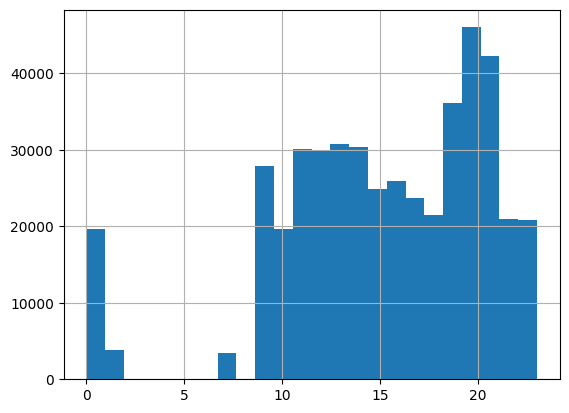

In [23]:
# convert from unix timestamp to datetime
data_df['battleAt'] = pd.to_datetime(data_df['battleAt'], unit='s')

# plot distribution of time of day game was played
data_df['battleAt'].dt.hour.hist(bins=24)

# get the date range of the data as a human readable string
data_date_range = f"{data_df['battleAt'].dt.date.min()} to {data_df['battleAt'].dt.date.max()}"
print(data_date_range)

In [24]:
# iterate over the master dataframe and calculate the difference in tekken power for each game
# then calculate the mean difference
ranked_master_df = master_df[master_df['battleType'] == 2]

def calculate_summary_ranked_stats(df):
    import seaborn as sns
    tekken_power_diffs = tekken_power_diffs = (df['1pTekkenPower'] - df['2pTekkenPower']).abs()
    mean_diff = tekken_power_diffs.mean()
    print(f'The mean difference in tekken power is {mean_diff}')

    # also calculate the standard deviation of the difference in tekken power
    std_diff = tekken_power_diffs.std()
    print(f'The standard deviation of the difference in tekken power is {std_diff}')

    # max difference in tekken power
    max_diff = tekken_power_diffs.max()
    print(f'The max difference in tekken power is {max_diff}')

    # plot dstribution of the difference in tekken power using seaborn
    # make sure to give the plot a title, x axis label and useful ticks
    sns.histplot(tekken_power_diffs, kde=True, bins=100)
    plt.xlabel('Difference in tekken power')
    plt.title('Distribution of the difference in tekken power')
    plt.show()

    # find the mean difference in tekken rank 
    # iterate over the master dataframe and calculate the difference in tekken rank for each game
    # making sure to use the absolute value of the difference
    # then calculate the mean difference
    tekken_rank_diffs = (df['1pRank'] - df['2pRank']).abs()
    mean_diff = tekken_rank_diffs.mean()
    print(f'The mean difference in tekken rank is {mean_diff}')

    # plot dstribution of the difference in tekken rank using seaborn
    # make sure to give the x axis a label and useful ticks
    sns.histplot(tekken_rank_diffs, bins=30)
    plt.xlabel('Difference in tekken rank')
    plt.show()    

    
    # also calculate the standard deviation of the difference in tekken rank
    std_diff = tekken_rank_diffs.std()
    print(f'The standard deviation of the difference in tekken rank is {std_diff}')


    # let's also figure out the mean number of rounds in a game
    mean_rounds = df['totalRoundNum'].mean()
    print(f'The mean number of rounds in a game is {mean_rounds}')

    #and also the standard deviation
    std_rounds = df['totalRoundNum'].std()
    print(f'The standard deviation of the number of rounds in a game is {std_rounds}')


    # let's also figure out how much predicitve power the prowess rating has
    # we can do this by calculating the correlation between the prowess rating and the outcome of the game
    # we can use the spearman correlation
    correlation = df['2pTekkenPower'] - df['1pTekkenPower']
    correlation = correlation.corr(df['winResult'], method='spearman')
    print(f'The correlation between the prowess rating and the outcome of the game is {correlation}')


    # let's also figure out how much predicitve power the rank has
    # we can do this by calculating the correlation between the rank and the outcome of the game
    # we can use the spearman correlation
    correlation = df['2pRank'] - df['1pRank']
    correlation = correlation.corr(df['winResult'], method='spearman')
    print(f'The correlation between the rank and the outcome of the game is {correlation}')


In [25]:
ranked_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498462 entries, 1 to 3048947
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   battleId       498462 non-null  object        
 1   battleType     498462 non-null  int64         
 2   gameVersion    498462 non-null  int64         
 3   winResult      498462 non-null  int64         
 4   totalRoundNum  498462 non-null  int64         
 5   battleAt       498462 non-null  datetime64[ns]
 6   viewNum        498462 non-null  int64         
 7   stageId        498462 non-null  object        
 8   highlightFlag  498462 non-null  bool          
 9   1pUserId       498462 non-null  object        
 10  1pPlayerName   498462 non-null  object        
 11  1pPolarisId    498462 non-null  object        
 12  1pOnlineId     498462 non-null  object        
 13  1pNgWordFlag   498462 non-null  int64         
 14  1pPlatform     498462 non-null  int64         
 15  1pRa

The mean difference in tekken power is 20880.040295950344
The standard deviation of the difference in tekken power is 24432.89121632716
The max difference in tekken power is 351147


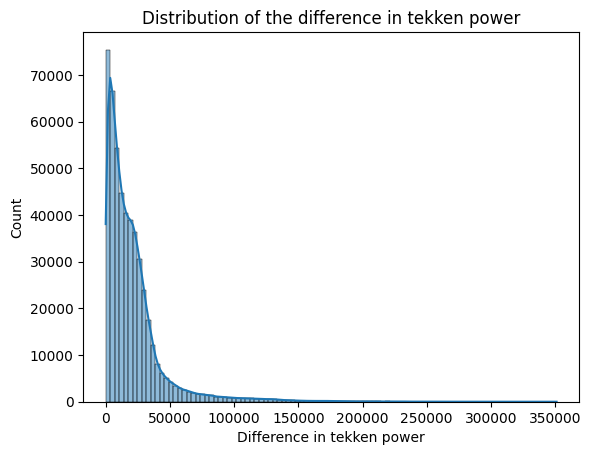

The mean difference in tekken rank is 1.4464412532951358


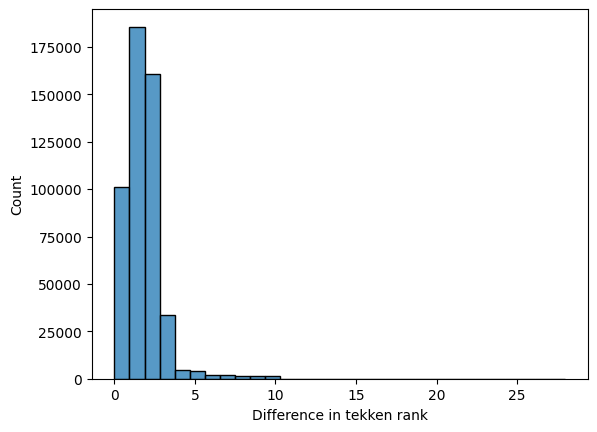

The standard deviation of the difference in tekken rank is 1.3575846749086207
The mean number of rounds in a game is 4.031246113043722
The standard deviation of the number of rounds in a game is 0.7948997205875659
The correlation between the prowess rating and the outcome of the game is 0.15568784814763872
The correlation between the rank and the outcome of the game is 0.2068777938240752


In [26]:
calculate_summary_ranked_stats(ranked_master_df)

The mean difference in tekken power is 29879.28363205671
The standard deviation of the difference in tekken power is 28924.37508381607
The max difference in tekken power is 371353


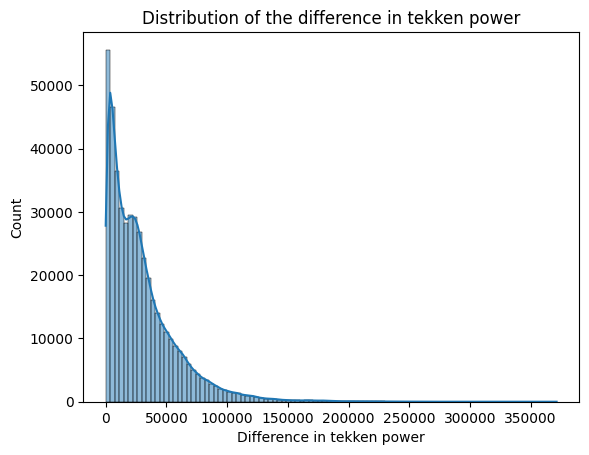

The mean difference in tekken rank is 1.468855847941715


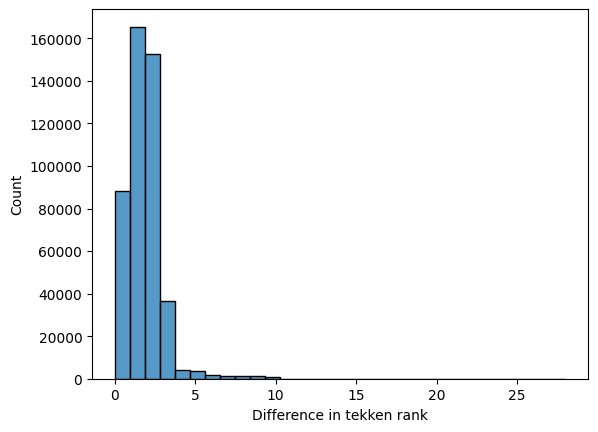

The standard deviation of the difference in tekken rank is 1.3019498536071454
The mean number of rounds in a game is 4.004908066623836
The standard deviation of the number of rounds in a game is 0.796238884018638
The correlation between the prowess rating and the outcome of the game is 0.24287657058969855
The correlation between the rank and the outcome of the game is 0.21991904809021878


In [27]:
calculate_summary_ranked_stats(data_df)

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rank_distribution(rank_counts, date_range, title):
    labels = [f'{dan_names_dict[k]} ({k})' for k in dan_names_dict.keys()][:-1]
    print(labels)

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    fig, ax = plt.subplots()
    ax.bar(x - width/2, rank_counts[0], width, label=date_range[0])
    ax.bar(x + width/2, rank_counts[1], width, label=date_range[1])


    ax.set_xlabel('Rank')
    ax.set_ylabel('Number of players')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()


['Beginner (0)', '1st Dan (1)', '2nd Dan (2)', 'Fighter (3)', 'Strategist (4)', 'Combatant (5)', 'Brawler (6)', 'Ranger (7)', 'Cavalry (8)', 'Warrior (9)', 'Assailant (10)', 'Dominator (11)', 'Vanquisher (12)', 'Destroyer (13)', 'Eliminator (14)', 'Garyu (15)', 'Shinryu (16)', 'Tenryu (17)', 'Mighty Ruler (18)', 'Flame Ruler (19)', 'Battle Ruler (20)', 'Fujin (21)', 'Raijin (22)', 'Kishin (23)', 'Bushin (24)', 'Tekken King (25)', 'Tekken Emperor (26)', 'Tekken God (27)', 'Tekken God Supreme (28)', 'God of Destruction (29)']


<Figure size 1000x500 with 0 Axes>

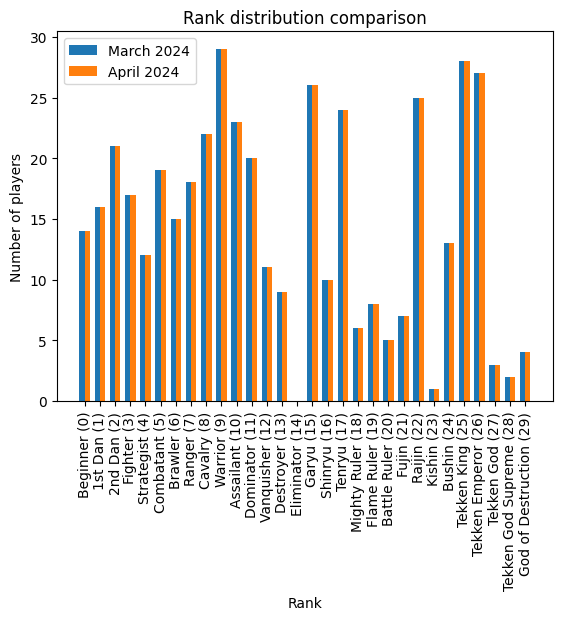

In [112]:
#TODO: figure out why destroyuers are not being displayed in the rank distribution plot
#TODO: do this with the may vs april data
plot_rank_distribution([rank_counts, rank_counts], ['March 2024', 'April 2024'], 'Rank distribution comparison')

<Axes: title={'center': 'Tekken Power'}, xlabel='Distribution of Tekken Power', ylabel='Count'>

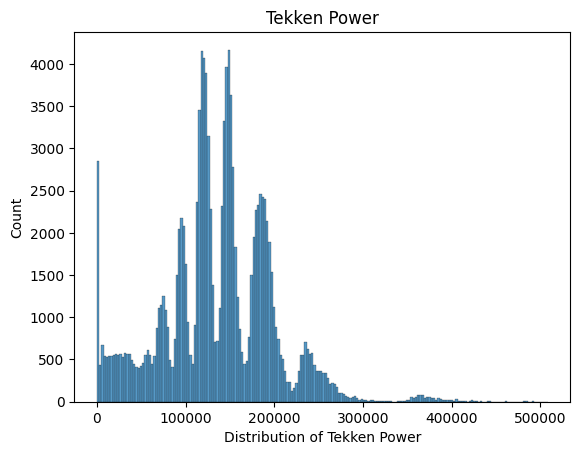

In [79]:

# plot the distribution of tekkken power for all unique players using a kde plot
tekken_power_values = [data['tekken_power'] for user_id, data in unique_players.items()]
plt.xlabel('Distribution of Tekken Power')
plt.title('Tekken Power')
sns.histplot(tekken_power_values, kde=False, bins=200)

c:\Users\omer\AppData\Local\pypoetry\Cache\virtualenvs\ce-Ab_wKMWK-py3.12\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\omer\AppData\Local\pypoetry\Cache\virtualenvs\ce-Ab_wKMWK-py3.12\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


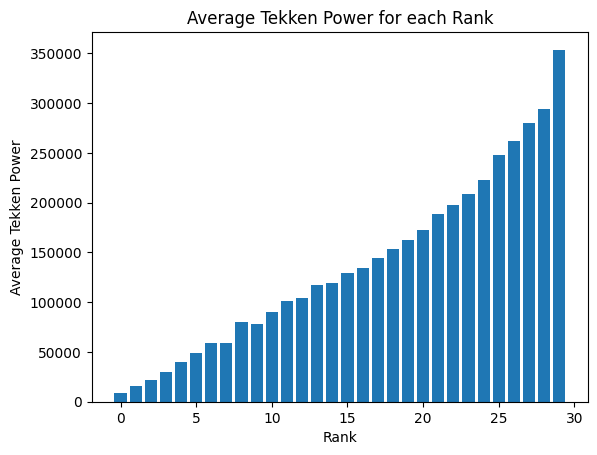

In [74]:
# let's plot the average tekken power for each rank
average_tekken_power = {}
for rank in dan_names_dict.keys():
    average_tekken_power[rank] = []
    for user_id, data in unique_players.items():
        if data['rank'] == rank:
            average_tekken_power[rank].append(data['tekken_power'])
    average_tekken_power[rank] = np.mean(average_tekken_power[rank])

average_tekken_power = {k: v for k, v in sorted(average_tekken_power.items())}
plt.bar(average_tekken_power.keys(), average_tekken_power.values())
plt.xlabel('Rank')
plt.ylabel('Average Tekken Power')
plt.title('Average Tekken Power for each Rank')
plt.show()

In [91]:
#TODO: longest common substring maybe?

def levenshteinDistanceDP(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    return distances[len(token1)][len(token2)]

    
# now we can iterate over the master dataframe and calculate the similarity between the names of each pair of players
# then we can find the pair with the smallest distance
min_similarity = np.inf
min_similarity_pair = None
for index, row in ranked_master_df.iterrows():
    similarity = levenshteinDistanceDP(row['1pPlayerName'], row['2pPlayerName'])
    if similarity <= min_similarity:
        min_similarity = similarity
        min_similarity_pair = (row['1pPlayerName'], row['2pPlayerName'])
        print(row[['1pPlayerName', '2pPlayerName', '1pCharaId', '2pCharaId', 'winResult', '1pRank', '2pRank']])
        print(f'Similarity: {similarity}')
        print('\n\n')

print(f'The pair of players with the most similar names are {min_similarity_pair} with a similarity score of {min_similarity}')

1pPlayerName        たちばな
2pPlayerName     Ri_wall
1pCharaId       chr_0011
2pCharaId       chr_0029
winResult              2
1pRank                14
2pRank                16
Name: 1, dtype: object
Similarity: 7.0



1pPlayerName    Briareos
2pPlayerName       Sioda
1pCharaId       chr_0003
2pCharaId       chr_0033
winResult              1
1pRank                12
2pRank                12
Name: 5, dtype: object
Similarity: 7.0



1pPlayerName        주석94
2pPlayerName        시비로옹
1pCharaId       chr_0007
2pCharaId       chr_0020
winResult              2
1pRank                14
2pRank                13
Name: 14, dtype: object
Similarity: 4.0



1pPlayerName      Boppin
2pPlayerName        Popo
1pCharaId       chr_0022
2pCharaId       chr_0011
winResult              2
1pRank                19
2pRank                20
Name: 175, dtype: object
Similarity: 4.0



1pPlayerName       AStOs
2pPlayerName       AKIRA
1pCharaId       chr_0011
2pCharaId       chr_0032
winResult              2
1pRa

In [111]:
# what is the stage with the highest win rate for chr_0033
# we can do this by filtering the master dataframe to only include games where chr_0033 is present
# then we can calculate the win rate for each stage
# then we can find the stage with the highest win rate

def get_stage_winrates_for_char(char = 'chr_0014'):
    chr_0033_games = ranked_master_df[(ranked_master_df['1pCharaId'] == char) | (ranked_master_df['2pCharaId'] == char)]
    stage_win_rates = {}
    for stage in stage_dict.keys():
        stage_games = chr_0033_games[chr_0033_games['stageId'] == stage]
        win_count = stage_games[(stage_games['winResult'] == 1) & (stage_games['1pCharaId'] == char)].shape[0]
        win_count += stage_games[(stage_games['winResult'] == 2) & (stage_games['2pCharaId'] == char)].shape[0]
        total_games = stage_games.shape[0]
        if total_games == 0:
            stage_win_rates[stage] = 0
        else:
            stage_win_rate = win_count / total_games

        stage_win_rates[stage_dict[stage]] = stage_win_rate

    stage_win_rates = {k: v for k, v in sorted(stage_win_rates.items(), key=lambda item: item[1], reverse=True)}
    return stage_win_rates

stage_win_rates = get_stage_winrates_for_char()
print(stage_win_rates)


{'Descent into Subconscious': 0.5229724330803036, 'Into the Stratosphere': 0.521827825377397, 'Ortiz Farm': 0.5146014206787688, 'Urban Square Evening': 0.5136251032204789, 'Arena': 0.5127882599580713, 'Midnight Siege': 0.5111018014243821, 'Sanctum': 0.51103088648215, 'Secluded Training Ground': 0.5107655502392344, 'Rebel Hangar': 0.509367681498829, 'Coliseum of Fate': 0.5088, 'Fallen Destiny': 0.5081624110506489, 'Celebration On The Seine': 0.507421875, 'Yakushima': 0.5062931384490459, 'Urban Square': 0.5042804728903384, 'Arena Underground': 0.5, 'Elegant Palace': 0.4987223168654174}
